In [16]:
%reload_ext autoreload
%autoreload 2

In [17]:
from test_extract_file_lists import test_get_config
import numpy as np
import pandas as pd
from pandas_summary import DataFrameSummary
from toolz import concatv
from pathlib import Path
from nbc_analysis.utils.debug_utils import runit

from nbc_analysis import size_batches

%matplotlib inline

In [18]:
CONFIG_F = 'default'
config= runit(test_get_config)
config

>> created example config file '/Users/wmcabee/.config/nbc_analysis/config_example.yaml'
>> Using default config


{'VIDEO_END_BUCKET': 'nbc-event',
 'BATCHES_D': '/Users/wmcabee/DATA/NBC2/batches',
 'FILE_LISTS_D': '/Users/wmcabee/DATA/NBC2/file_lists',
 'BATCH_SPEC_D': '/Users/wmcabee/DATA/NBC2/batch_spec',
 'PARTITIONS_D': '/Users/wmcabee/DATA/NBC2/partitions',
 'BATCH_SIZE': 200000000,
 'DAYS_LIMIT': 7,
 'BATCH_LIMIT': 2,
 'BATCH_FILES_LIMIT': 2}

In [19]:
df = runit(size_batches,config_f=CONFIG_F)

>> created example config file '/Users/wmcabee/.config/nbc_analysis/config_example.yaml'
>> Using default config
>> wrote outfile=/Users/wmcabee/DATA/NBC2/batch_spec/batch_to_file.csv,cnt=59803
>> wrote outfile=/Users/wmcabee/DATA/NBC2/batch_spec/batches.csv,cnt=129


In [5]:
df.head()

,batch_id,day,batch_num,total_size,file_cnt,file_dt_min
0,ve_20190701_0000,20190701,0,199138234,312,20190701000551509539
1,ve_20190701_0001,20190701,1,199611181,275,20190701005923727056
2,ve_20190701_0002,20190701,2,200872141,262,20190701014555640922
3,ve_20190701_0003,20190701,3,198791066,265,20190701023102558073
4,ve_20190701_0004,20190701,4,200790545,295,20190701031601226082


In [6]:
dfs = DataFrameSummary(df)
dfs.columns_stats.T

,counts,uniques,missing,missing_perc,types
batch_id,129,129,0,0%,unique
day,129,7,0,0%,numeric
batch_num,129,21,0,0%,numeric
total_size,129,129,0,0%,numeric
file_cnt,129,113,0,0%,numeric
file_dt_min,129,129,0,0%,unique


mean                         463.589
std                          241.764
variance                     58449.7
min                               41
max                             1379
mode                             393
5%                             236.8
25%                              317
50%                              399
75%                              504
95%                           1054.6
iqr                              187
kurtosis                     3.07222
skewness                      1.7395
sum                            59803
mad                          167.461
cv                          0.521504
zeros_num                          0
zeros_perc                        0%
deviating_of_mean                  3
deviating_of_mean_perc         2.33%
deviating_of_median               10
deviating_of_median_perc       7.75%
top_correlations                    
counts                           129
uniques                          113
missing                            0
m

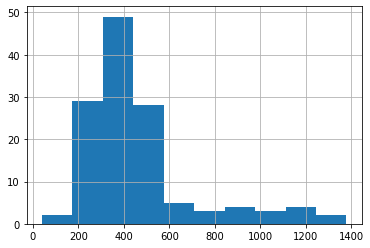

In [15]:
dfs['file_cnt']